In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
import warnings
warnings.filterwarnings('ignore')

# Concrete_Data DataSet

In [2]:
cc = pd.read_csv('Concrete_Data.csv')
cc.head(3)

Cement  Blast  Fly  Water  Superplasticizer  Coarse   Fine  Age  Strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27

In [3]:
X = cc.drop(columns='Strength')
y = cc.Strength
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3)

In [4]:
dtr = DecisionTreeRegressor(random_state=24)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.83089474226832


### Grid Search CV

In [10]:
dtr = DecisionTreeRegressor(random_state=24)
params = params = {  'min_samples_leaf' : [2,10,25,50],
'min_samples_split' : [2,10,25,50],
'max_depth' : [None, 4, 6]}
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(dtr, param_grid=params,cv=kfold, scoring="r2",verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.886 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.810 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.884 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.833 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.877 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10;, score=0.886 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10;, score=0.790 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10;, score=0.821 total time=   0.0s
[CV 5/5] END max

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [2, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [11]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8580807204193125
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [12]:
best_tree_model = gcv.best_estimator_

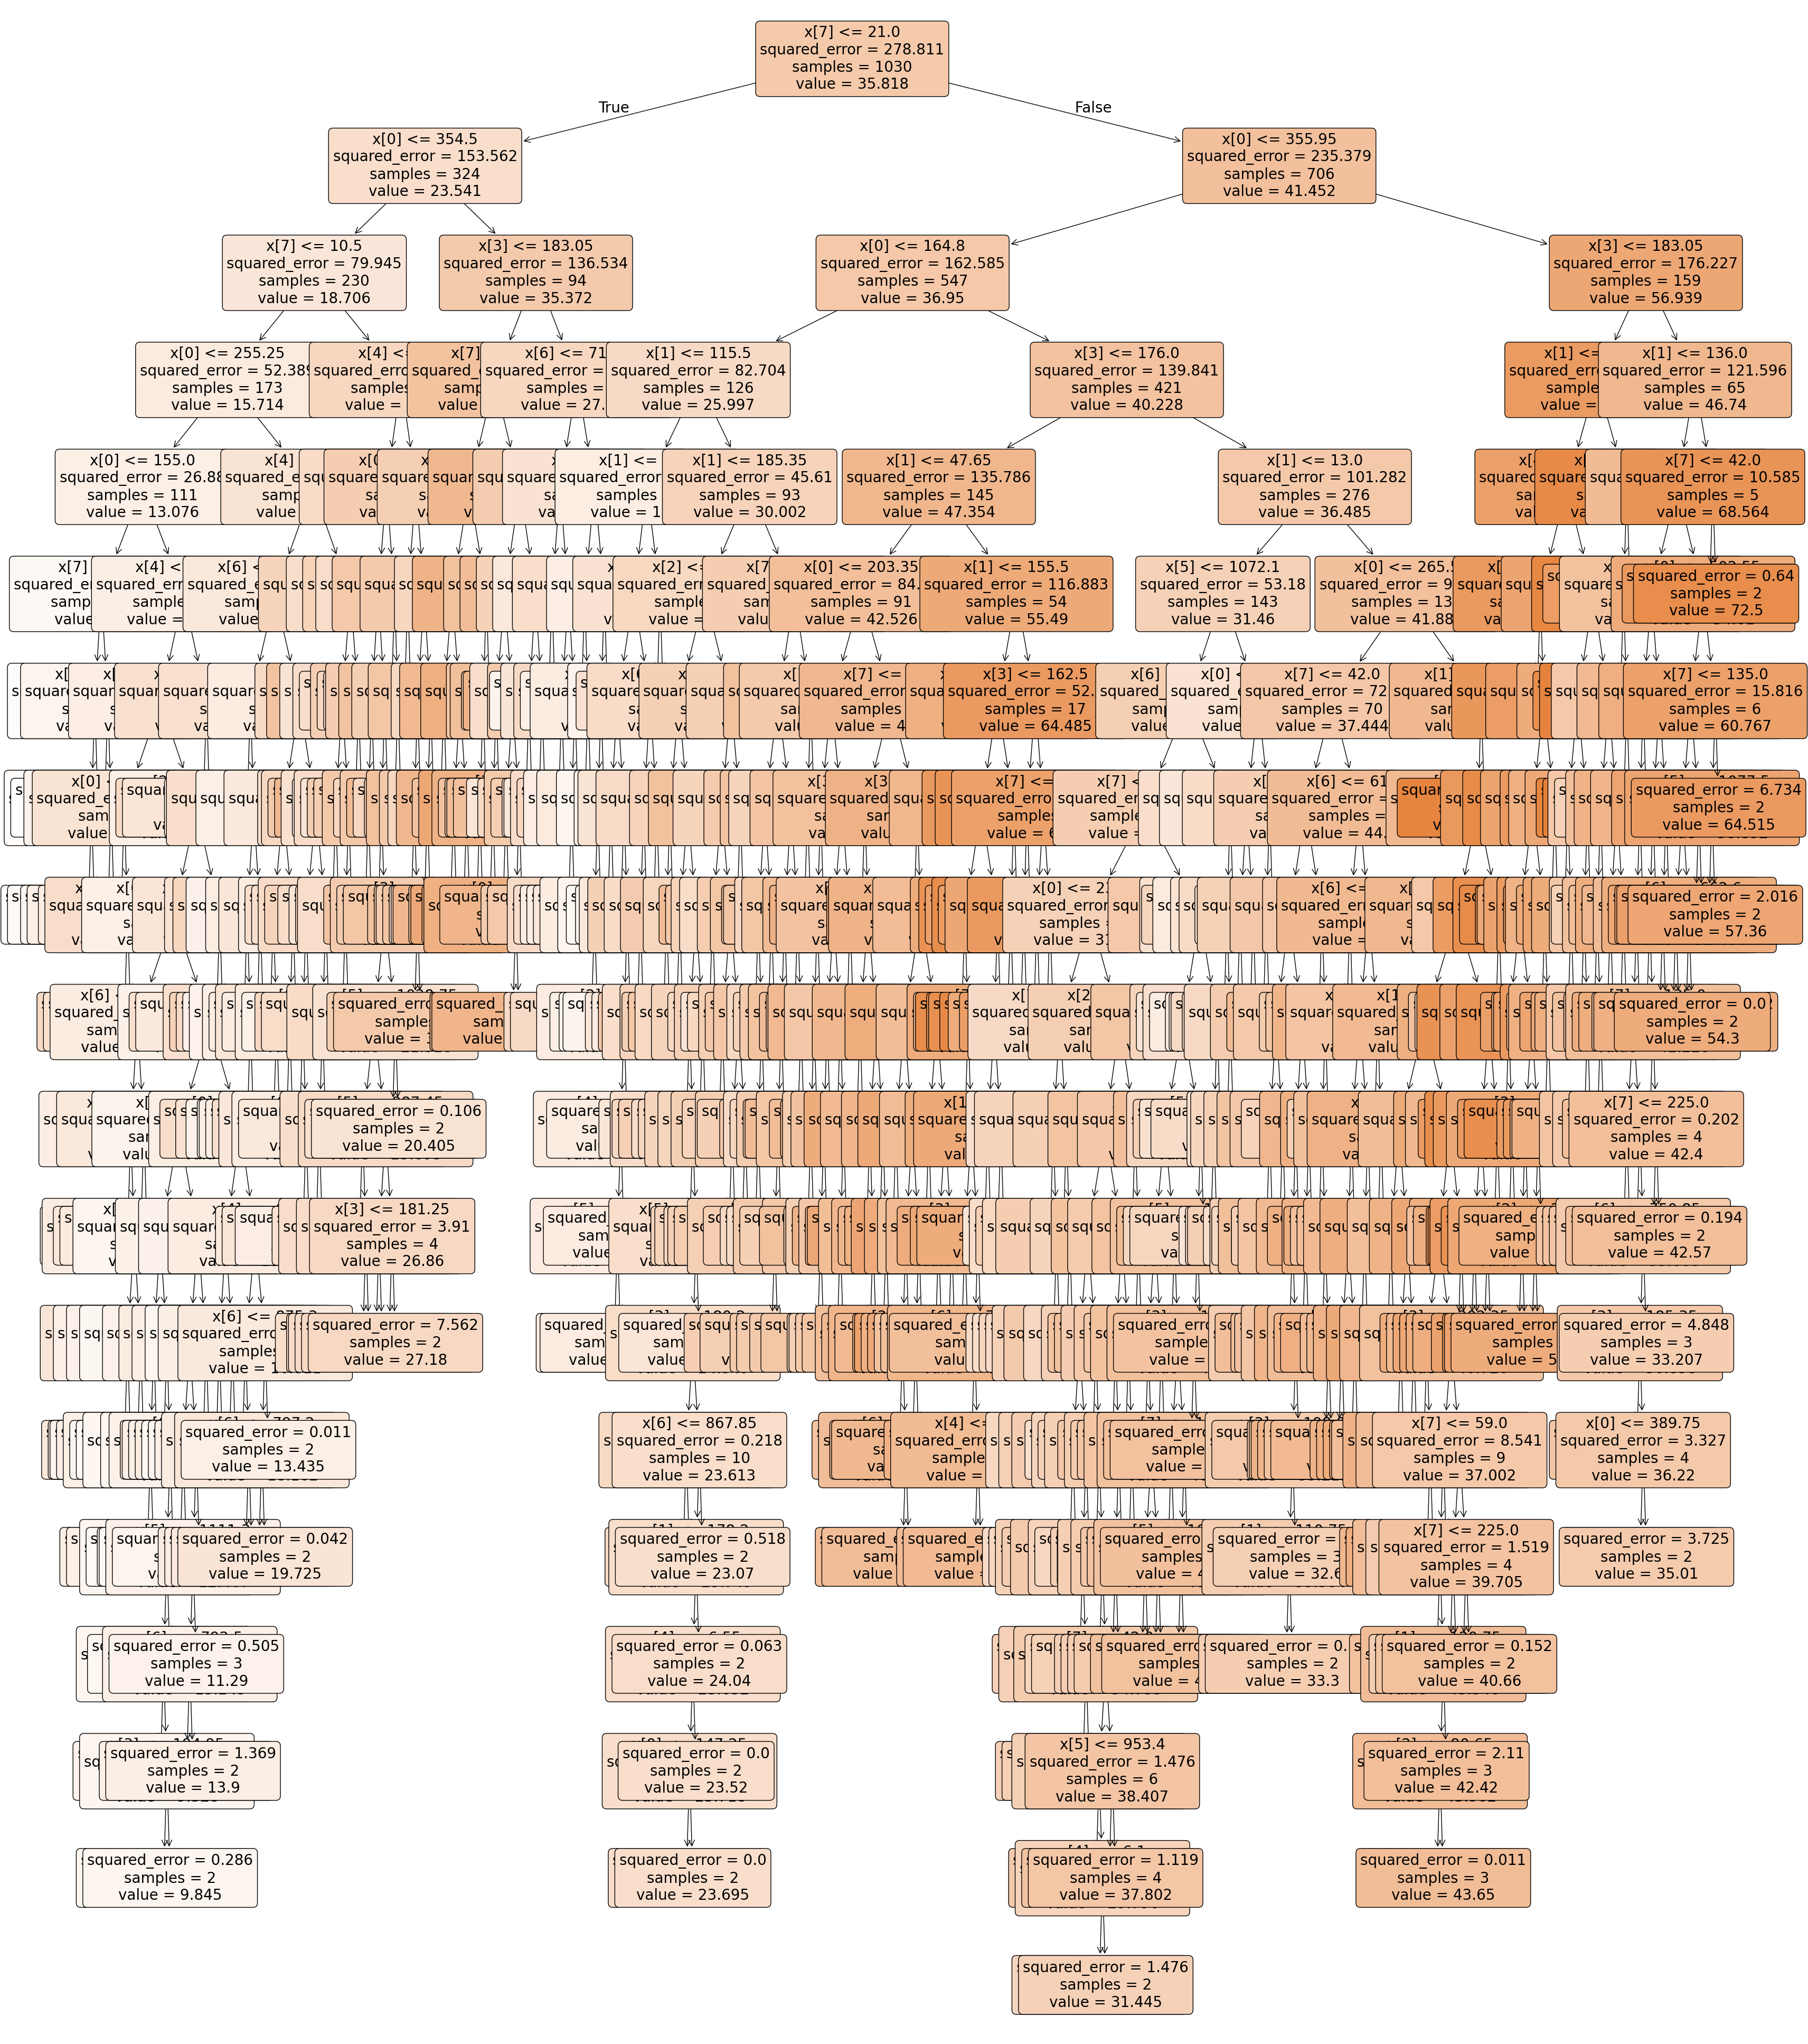

In [17]:
plt.figure(figsize=(40,50))
plot_tree(best_tree_model, 
          filled=True, 
          rounded=True, 
          fontsize=20)
plt.show()

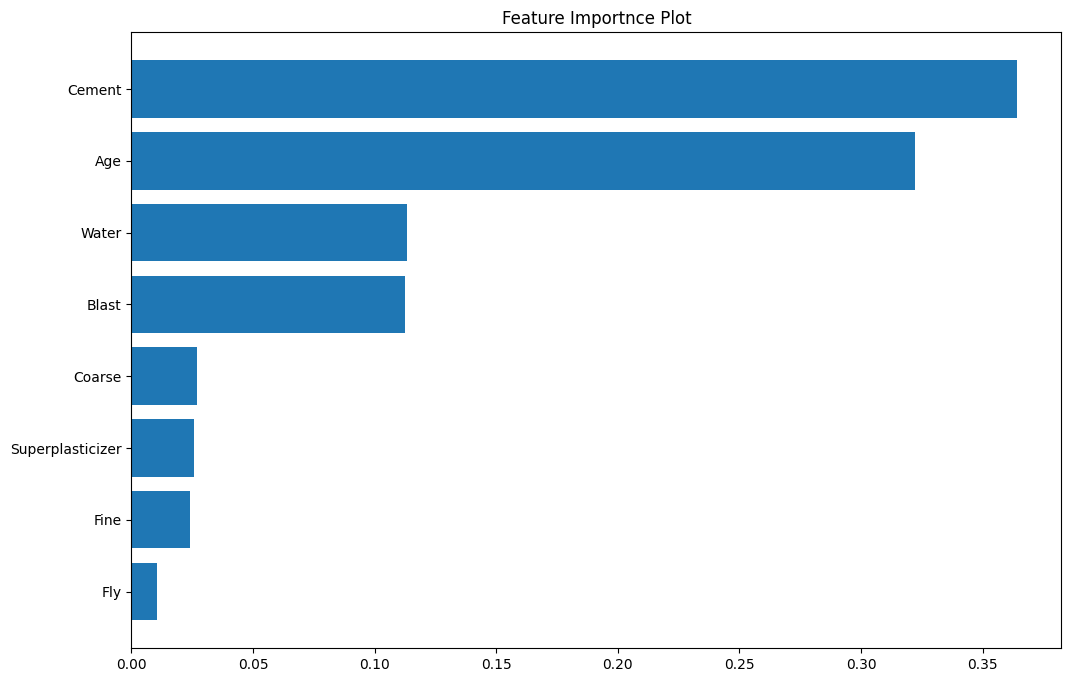

In [9]:
cc_imp = pd.DataFrame({'feature': list(X.columns),
                      'importance':best_tree_model.feature_importances_})
cc_imp.sort_values('importance', inplace=True)
plt.figure(figsize=(12,8))
plt.barh(cc_imp['feature'], cc_imp['importance'])
plt.title("Feature Importnce Plot")
plt.show()

# Medical Cost Insaurance DataSet

In [27]:
insaurance = pd.read_csv('insurance.csv')
insaurance.head(3)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620

In [52]:
X = insaurance.drop(columns='charges')
y = insaurance.charges

In [53]:
ohe = OneHotEncoder(drop = 'first', sparse_output=False)
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object)),
                            (ohe, make_column_selector(dtype_include=object)),
                             verbose_feature_names_out=False)

In [54]:
dtr = DecisionTreeRegressor(random_state=24)
pipe = Pipeline([('CT',ct),('DTR',dtr)])

In [55]:
params = params = {  'DTR__min_samples_leaf' : [2,5,10,25,50],
'DTR__min_samples_split' : [2,10,25,50],
'DTR__max_depth' : [None, 4, 6]}

kfold = KFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(pipe, param_grid=params,cv=kfold, scoring='r2', verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=2;, score=0.763 total time=   0.0s
[CV 2/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=2;, score=0.761 total time=   0.0s
[CV 3/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=2;, score=0.809 total time=   0.0s
[CV 4/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=2;, score=0.779 total time=   0.0s
[CV 5/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=2;, score=0.803 total time=   0.0s
[CV 1/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=10;, score=0.812 total time=   0.0s
[CV 2/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=10;, score=0.769 total time=   0.0s
[CV 3/5] END DTR__max_depth=None, DTR__min_samples_leaf=2, DTR__min_samples_split=10;, score=0.817 total time=   0.0s

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000013C77278200>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000013C772793D0>)],
                                                          verbose_feature_names_out=False)),
                                       ('DTR',
                                        DecisionTreeRegressor(random_state=24))]),
             param_grid={'DTR__max_depth': [None, 4, 6],
                         'DTR__min_samples_leaf': [2, 5, 10, 25, 50],
                         'DTR__min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [56]:
print(gcv.best_score_)
print(gcv.best_params_)

0.8510460855013513
{'DTR__max_depth': 6, 'DTR__min_samples_leaf': 50, 'DTR__min_samples_split': 2}


In [43]:
best_tree_model = gcv.best_estimator_.named_steps['DTR']

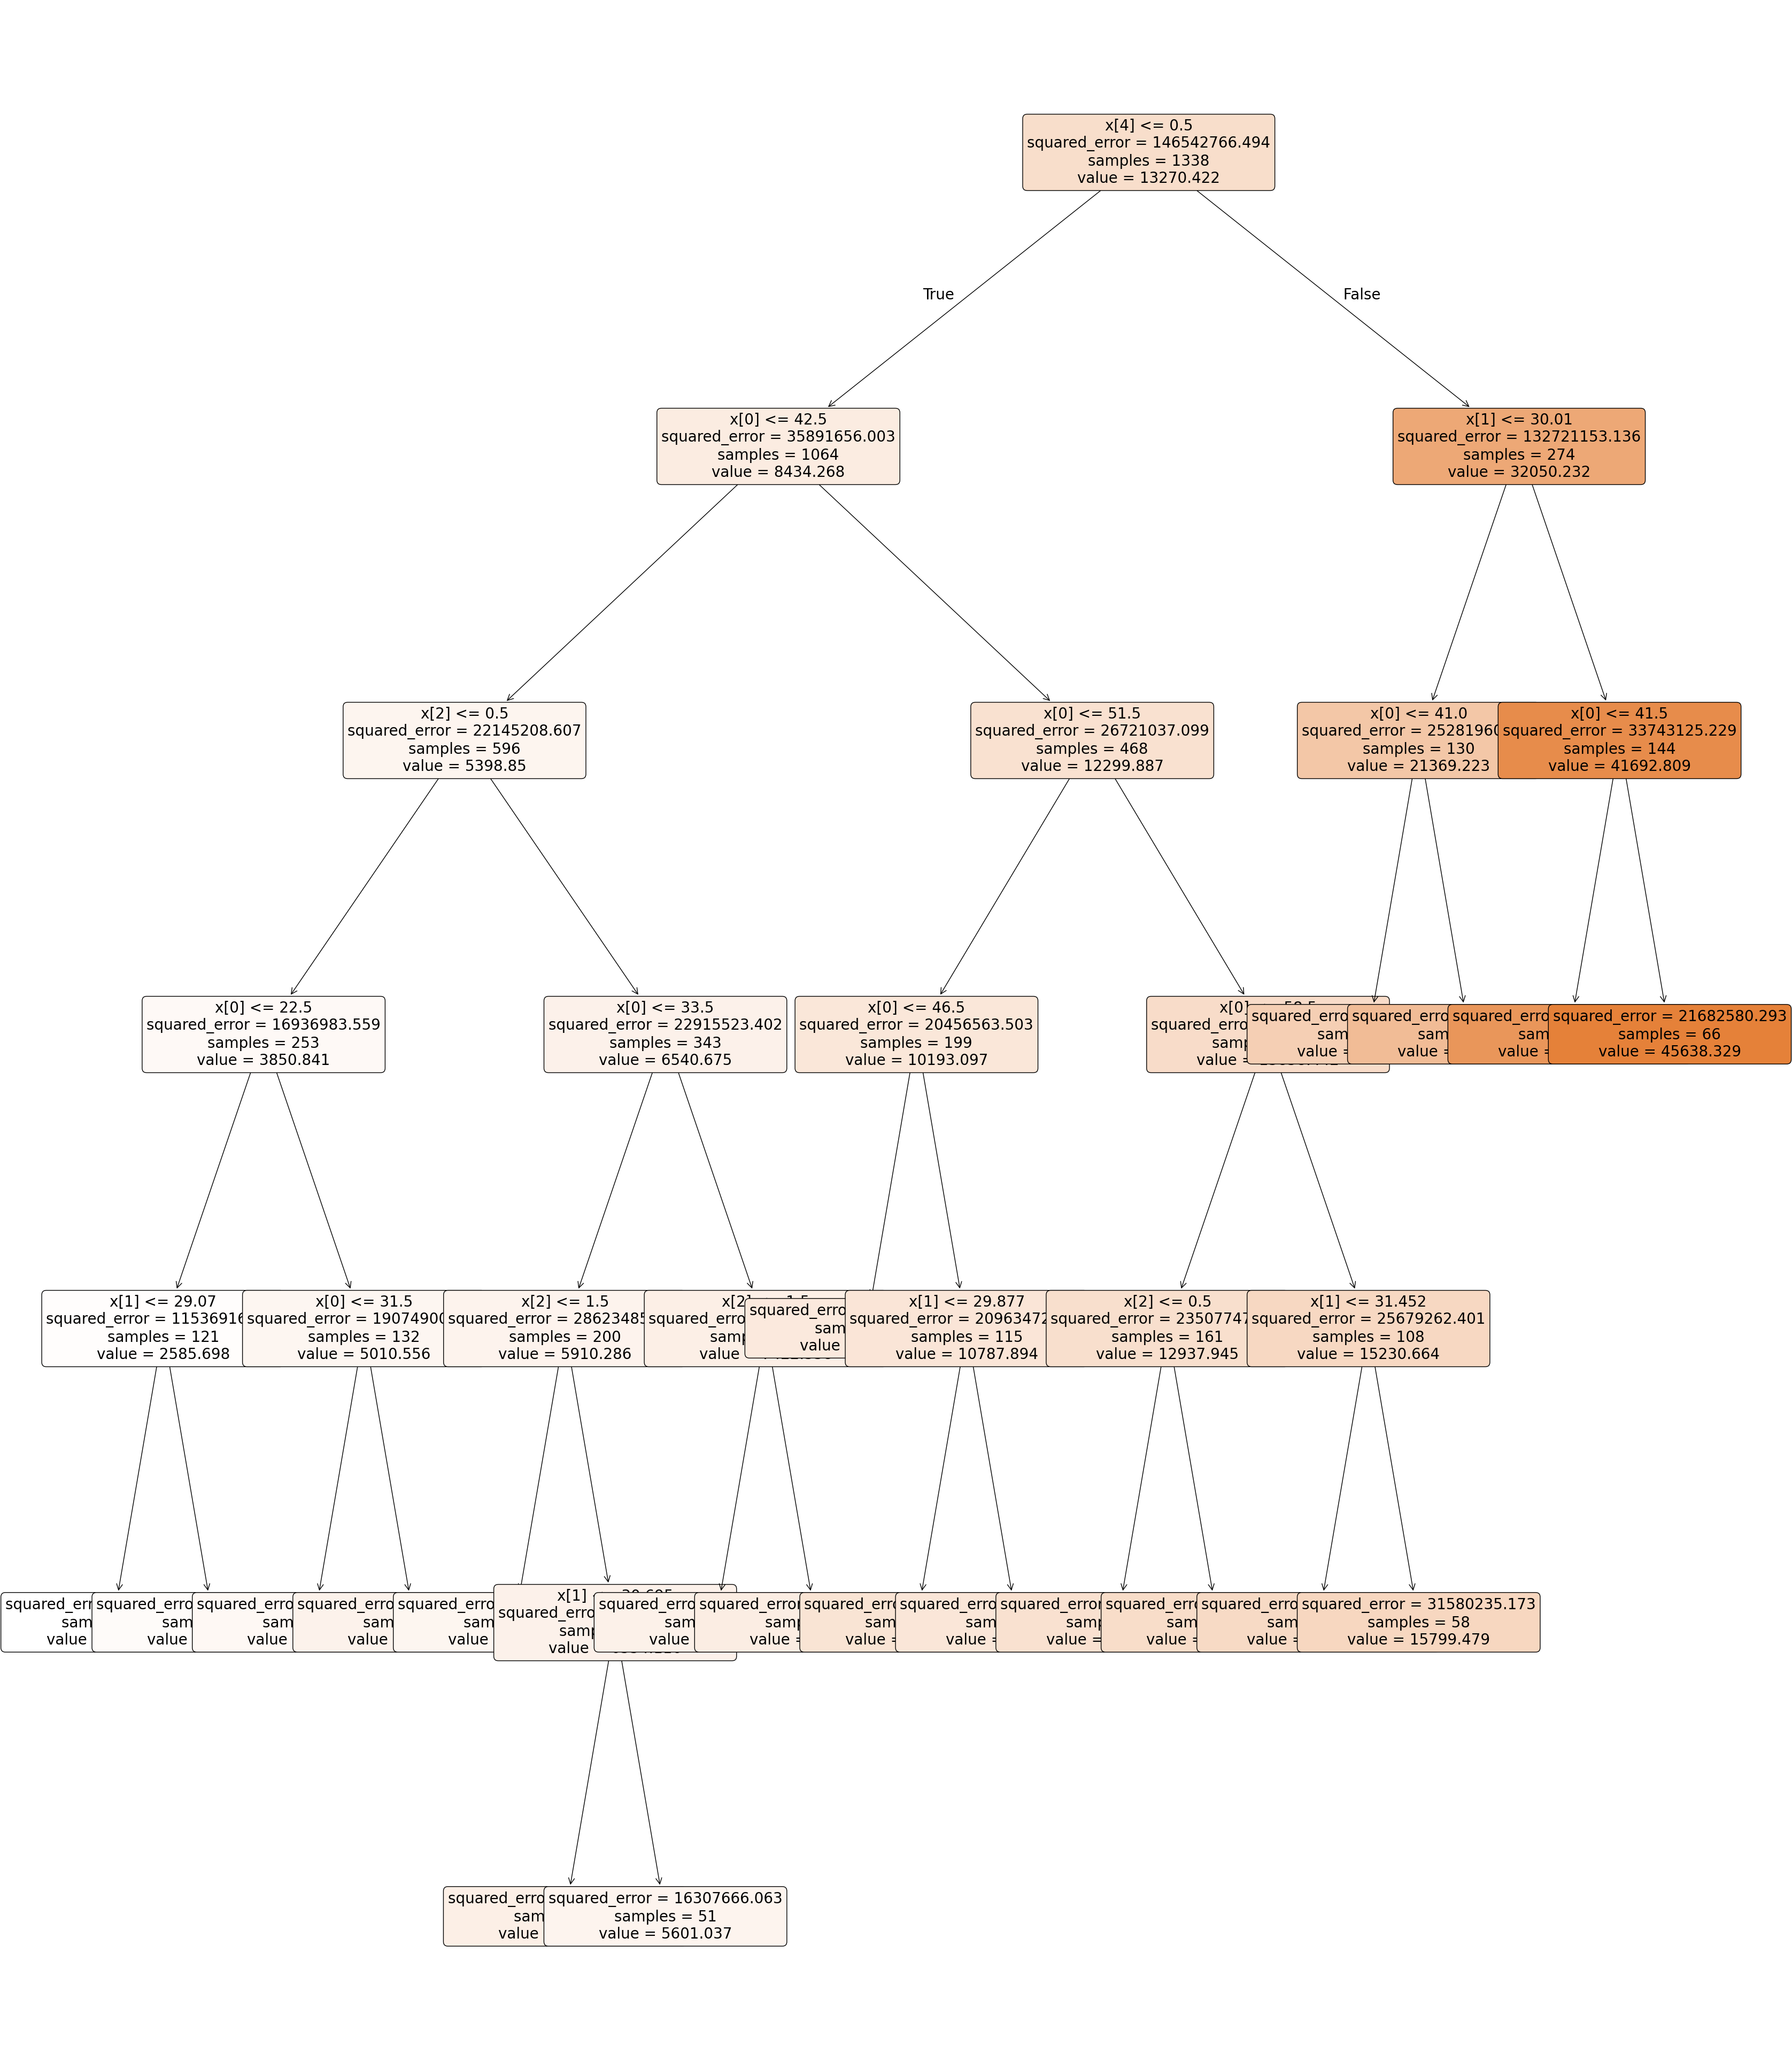

In [44]:
plt.figure(figsize=(40,50))
plot_tree(best_tree_model, 
          filled=True, 
          rounded=True, 
          fontsize=20)
plt.show()

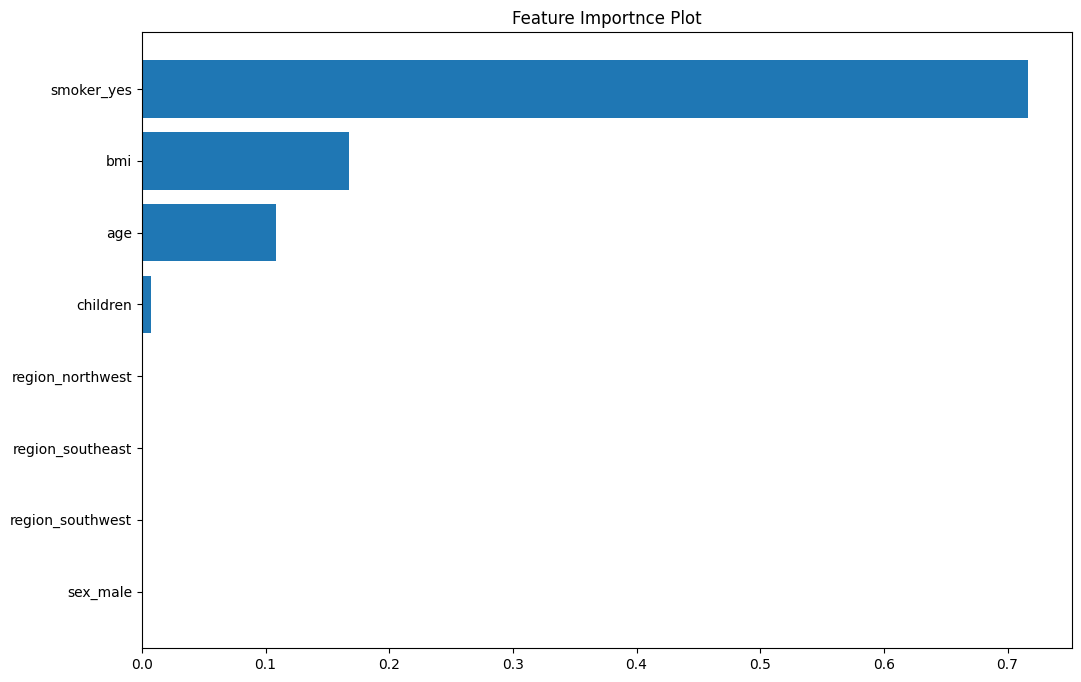

In [59]:
cc_imp = pd.DataFrame({'feature': list(gcv.best_estimator_.named_steps['CT'].get_feature_names_out()),
                      'importance':best_tree_model.feature_importances_})
cc_imp.sort_values('importance', inplace=True)
plt.figure(figsize=(12,8))
plt.barh(cc_imp['feature'], cc_imp['importance'])
plt.title("Feature Importnce Plot")
plt.show()